In [10]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.special import erf
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# faz a leitura do ficheiro de dados localizado no github

url = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
df = pd.read_csv(url,error_bad_lines=False)


In [12]:
# define as funções utilizadas nos modelos

def logistic_model(x,a,b,c):
    return c/(np.exp((b-x)/a)+1)

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

def log_logistic_model(x,a,b,c):
    return c/(1+np.power((x/a),(-1*b)))

def error_function_model(x,a,b,c,d):
    return a*(1+erf((x-b)/c))-d






In [13]:
x = list(df.index)
y = list(df.iloc[:,3])

In [14]:
# utiliza curve_fit para fazer o ajuste dos dados, calculando os parâmetros a,b,c

logistic_fit = curve_fit(logistic_model,x,y,p0=[6,37,24000])

param_a_logistic = logistic_fit[0][0]
param_b_logistic = logistic_fit[0][1]
param_c_logistic = logistic_fit[0][2]
 
print("Logistic model: a = % 5.2f; b = % 5.2f; c = % 5.2f" %(param_a_logistic, param_b_logistic, param_c_logistic))    


Logistic model: a =  13.32; b =  49.41; c =  19160.09


In [15]:
# calcula o erro associado ao ajuste efetuado 

errors_logistic = [np.sqrt(logistic_fit[1][i][i]) for i in [0,1,2]]

y_pred_logistic = [logistic_model(i,param_a_logistic,param_b_logistic,param_c_logistic) for i in x]



In [16]:
# calcula a data final da infeção resolvendo a equação associada ao modelo

sol_logistic = int(fsolve(lambda x : logistic_model(x,param_a_logistic,param_b_logistic,param_c_logistic) - int(param_c_logistic),param_b_logistic))
end_date_logistic = datetime(2020, 1, 1) + timedelta(days=sol_logistic)

                              

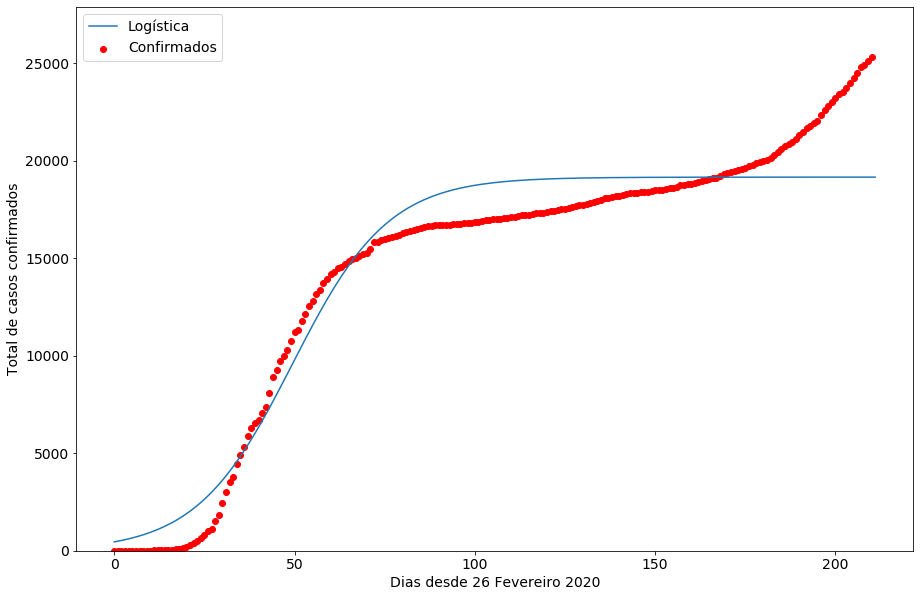

Erro quadrado médio do ajuste: 3110887 (modelo logístico)


In [17]:
# constrói o gráfico e mostra os resultados das predições

pred_x = list(range(max(x),sol_logistic))

plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('font', size=14)

# Real data
plt.scatter(x,y,label="Confirmados",color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,param_a_logistic,param_b_logistic,param_c_logistic) for i in x+pred_x], label="Logística" )

plt.legend()
plt.xlabel("Dias desde 26 Fevereiro 2020")
plt.ylabel("Total de casos confirmados")
plt.ylim((min(y)*0.9,max(y)*1.1))
plt.show()


print("Erro quadrado médio do ajuste: %1d (modelo logístico)" %mean_squared_error(y,y_pred_logistic))

